In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
from sample_data import *
users, ratings, books = get_saved_samples()

# Books

In [28]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...
18,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...


In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62209 entries, 1 to 271329
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 62209 non-null  object
 1   Book-Title           62209 non-null  object
 2   Book-Author          62209 non-null  object
 3   Year-Of-Publication  62209 non-null  object
 4   Publisher            62207 non-null  object
 5   Image-URL-S          62209 non-null  object
 6   Image-URL-M          62209 non-null  object
 7   Image-URL-L          62209 non-null  object
dtypes: object(8)
memory usage: 4.3+ MB


In [30]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,62209,62209,62209,62209,62207,62209,62209,62209
unique,62209,57268,27478,146,5366,62187,62187,62187
top,0002005018,"Phonics Fun: Reading Program, Pack 4 (Clifford...",Stephen King,2002,Harlequin,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
freq,1,12,236,4814,1849,2,2,2


In [31]:
books.duplicated().sum()

0

In [32]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [33]:
books.dropna(subset=['Book-Author', 'Publisher', 'Image-URL-L'], inplace=True)



In [34]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books.dropna(subset=['Year-Of-Publication'], inplace=True)




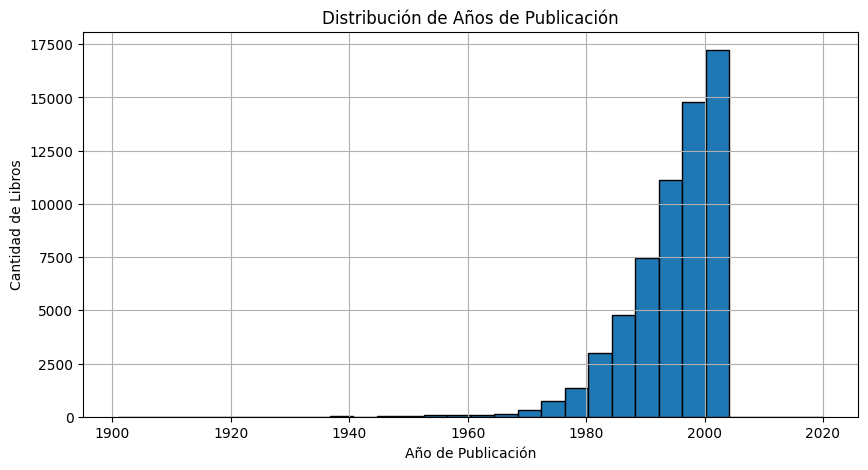

In [35]:
books = books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] <= pd.to_datetime('now').year)]

# Graficamos la distribución de los años de publicación
plt.figure(figsize=(10, 5))
books['Year-Of-Publication'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Años de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Libros')
plt.show()

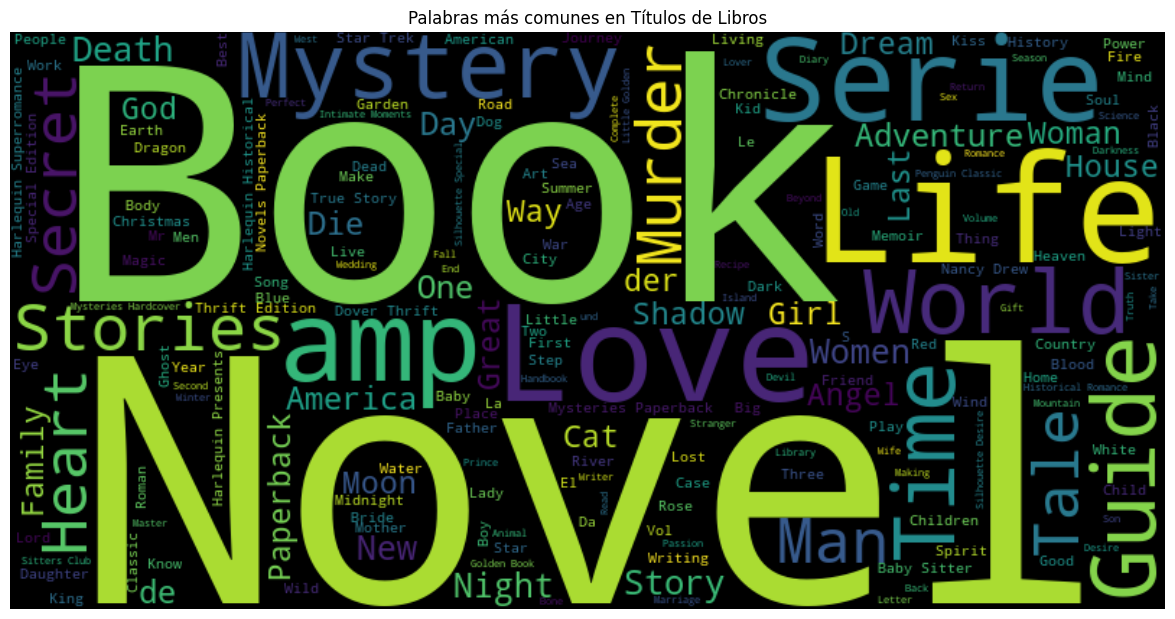

In [36]:
book_titles_string = ' '.join(books['Book-Title'].fillna(''))  # Unimos todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400).generate(book_titles_string)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title('Palabras más comunes en Títulos de Libros')
plt.show()